In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

**Assignment Planning**

In [ ]:
# List of tasks to be completed:
# Understand the nature of the data
# Histograms and boxplots
# Value counts
# Missing values
# Correlation between variables
# Explore interesting questions
# Feature engineering

Light Data Exploration

In [15]:
# I just need to get an idea of the ata types and null values
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   50000 non-null  float64
 1   f0      50000 non-null  float64
 2   f1      50000 non-null  float64
 3   f2      50000 non-null  float64
 4   f3      50000 non-null  float64
 5   f4      50000 non-null  float64
 6   f5      50000 non-null  float64
 7   f6      50000 non-null  float64
 8   f7      50000 non-null  float64
 9   f8      50000 non-null  float64
 10  f9      50000 non-null  float64
 11  f10     50000 non-null  float64
 12  f11     50000 non-null  float64
 13  f12     50000 non-null  float64
 14  f13     50000 non-null  float64
 15  f14     50000 non-null  float64
 16  f15     50000 non-null  float64
 17  f16     50000 non-null  float64
 18  f17     50000 non-null  float64
 19  f18     50000 non-null  float64
 20  f19     50000 non-null  float64
 21  f20     50000 non-null  float64
 22

The output above tells me that I have one column for the targets and the remaining columns are features represented as numerical values. There are no missing values in the provided training data.

In [12]:
training.describe()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.531300,0.991232,-0.006811,-0.000732,0.993825,-0.008596,0.987553,-0.006254,-0.002803,0.995464,...,-0.005375,-0.003756,0.986858,1.031884,1.022110,1.050021,1.011172,0.974119,1.032028,0.958785
std,0.499024,0.564973,1.007311,1.008880,0.595426,1.006594,0.471304,1.011110,1.010000,1.026840,...,1.010671,1.005632,1.393160,0.648316,0.368598,0.162819,0.399989,0.525330,0.361799,0.311875
min,0.000000,0.274697,-2.434976,-1.742508,0.003158,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.125548,0.342015,0.266788,0.319854,0.066392,0.303350,0.350939
25%,0.000000,0.592950,-0.745140,-0.871931,0.572091,-0.881750,0.677344,-0.696157,-0.869759,0.000000,...,-0.721686,-0.878138,0.000000,0.790732,0.846140,0.985770,0.768110,0.674527,0.819936,0.769645
50%,1.000000,0.855385,-0.009794,0.005410,0.888489,-0.013527,0.893216,-0.002006,-0.011307,1.086538,...,-0.007956,-0.005259,0.000000,0.894857,0.950145,0.989748,0.917472,0.874691,0.947102,0.870902
75%,1.000000,1.234579,0.732370,0.873213,1.291927,0.863734,1.170007,0.687194,0.869421,2.173076,...,0.714102,0.863975,3.101961,1.025404,1.082497,1.019578,1.141695,1.141194,1.137220,1.058376
max,1.000000,7.000281,2.431946,1.743236,6.582300,1.743102,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,16.601603,8.940148,3.931808,7.442589,11.994177,6.401313,4.835312


The output above confirms again that there are no missing values since each column shares the same count.

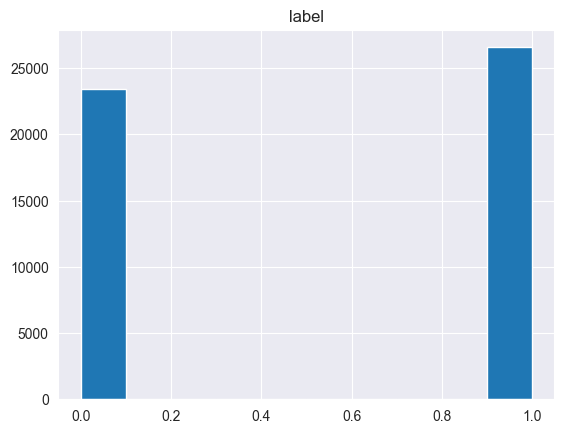

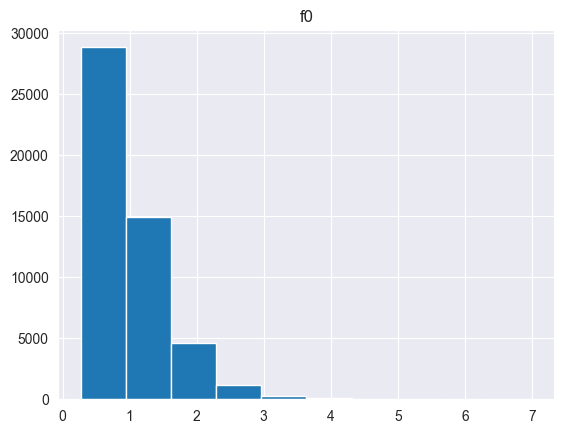

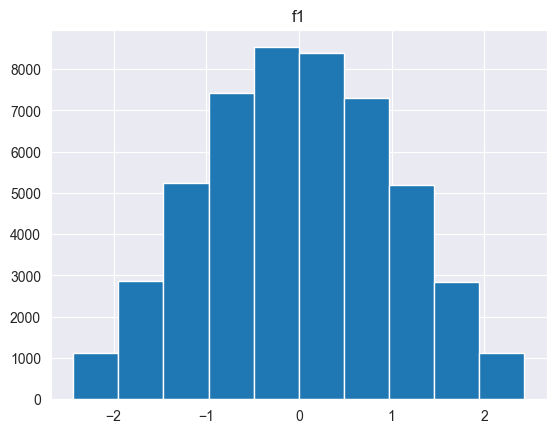

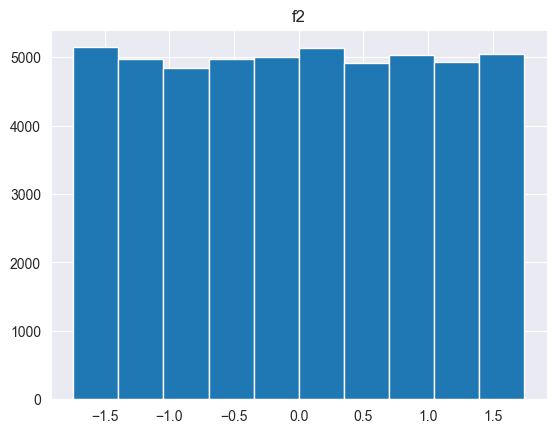

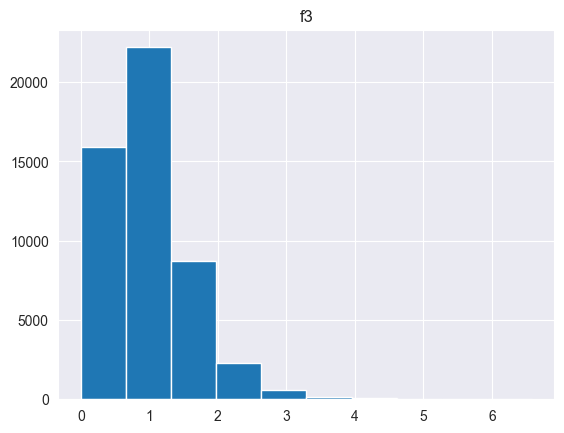

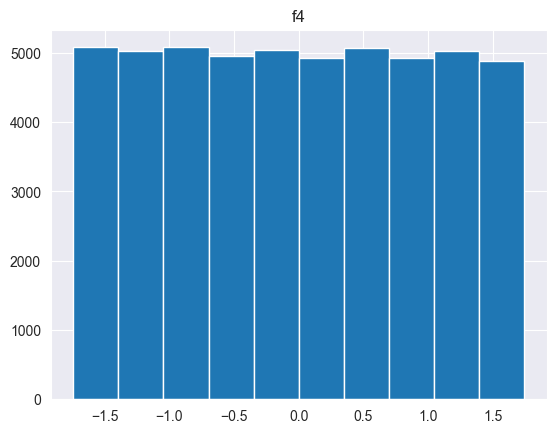

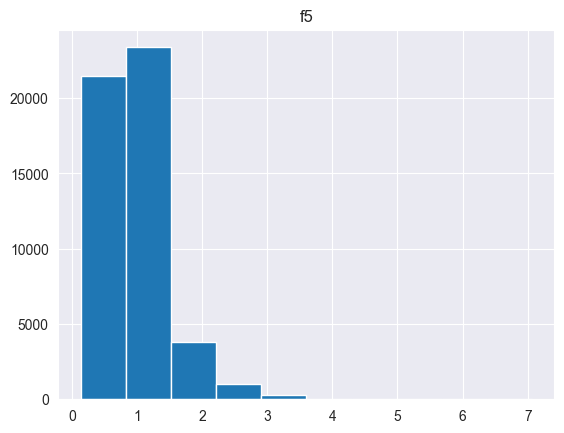

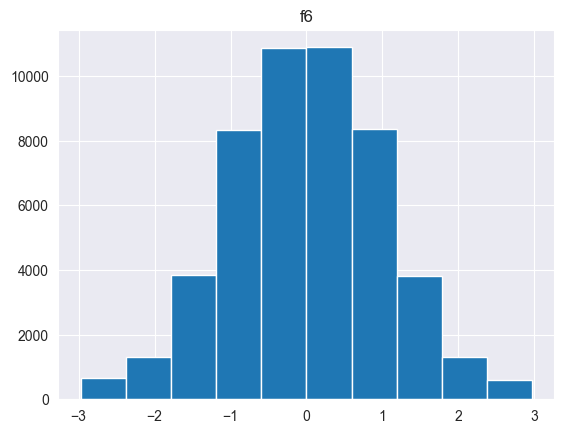

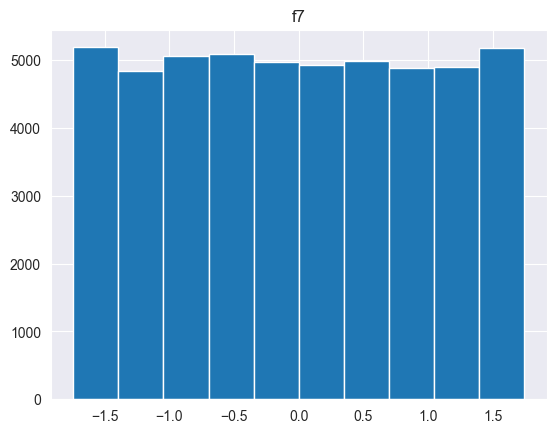

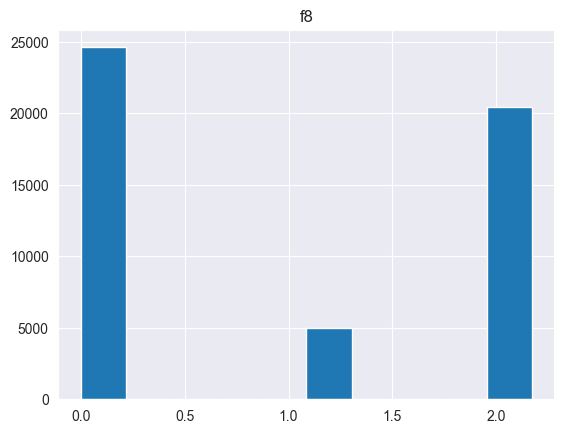

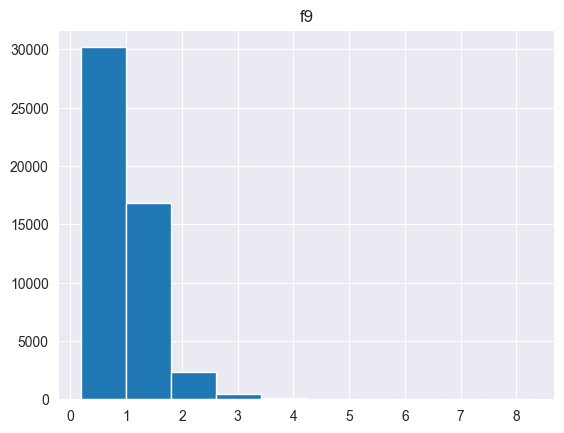

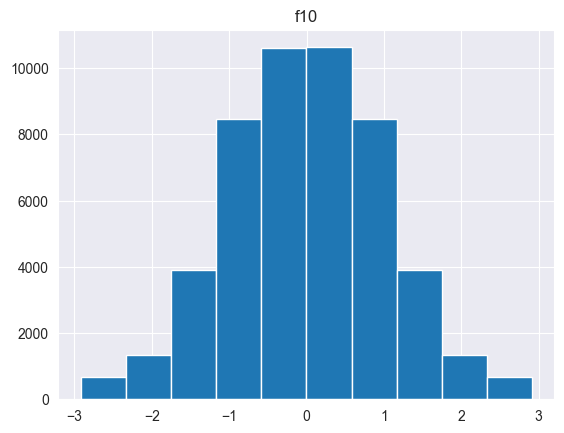

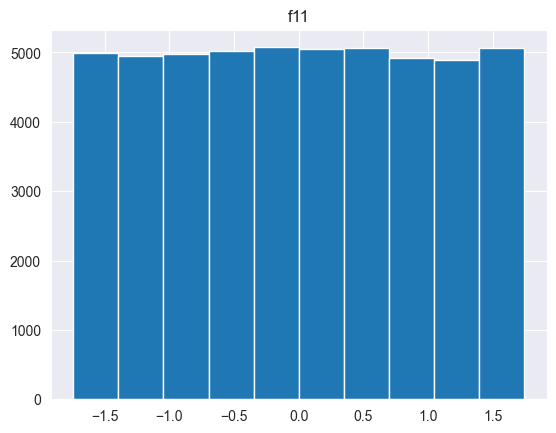

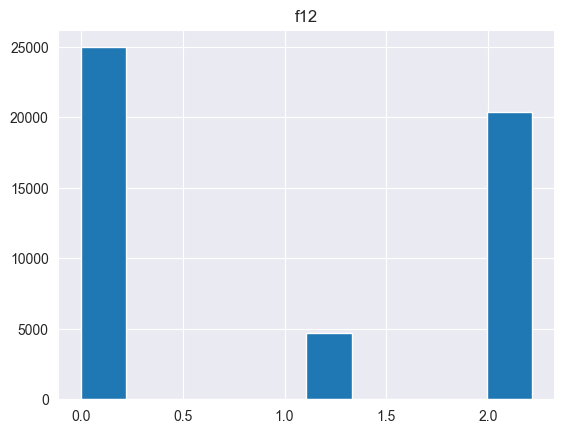

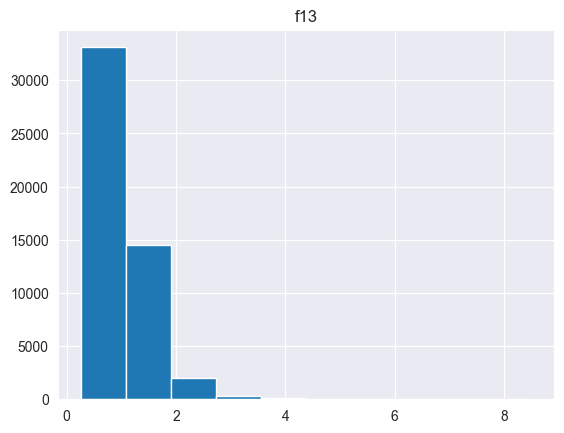

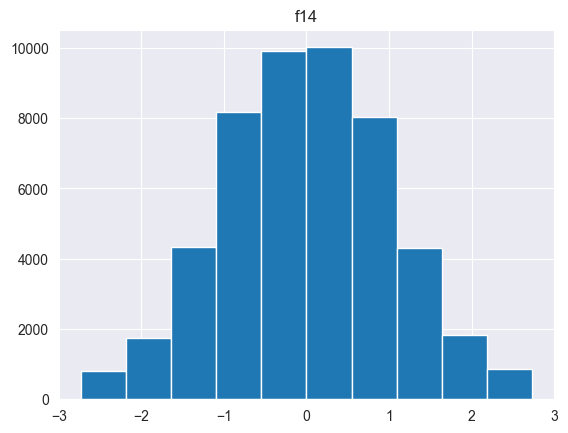

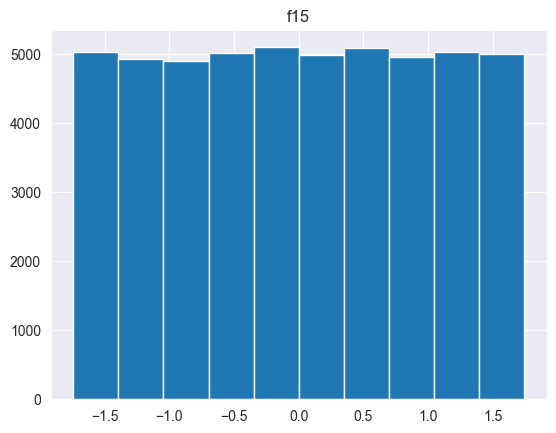

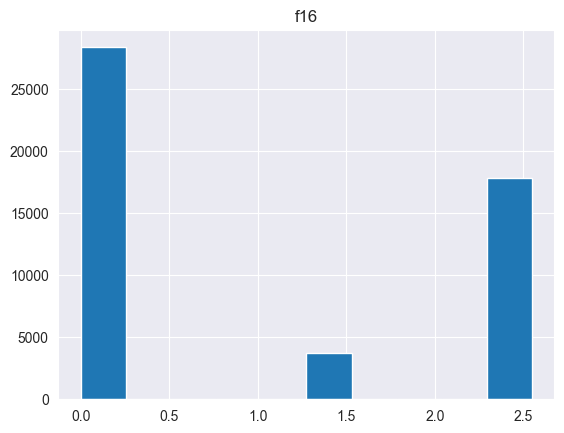

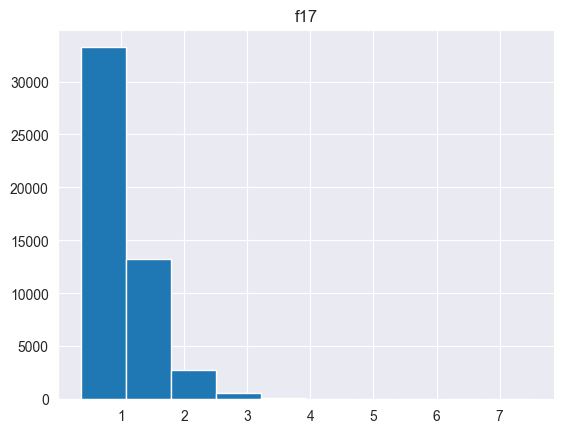

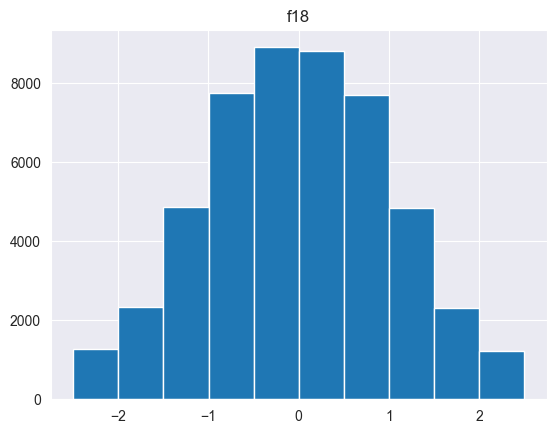

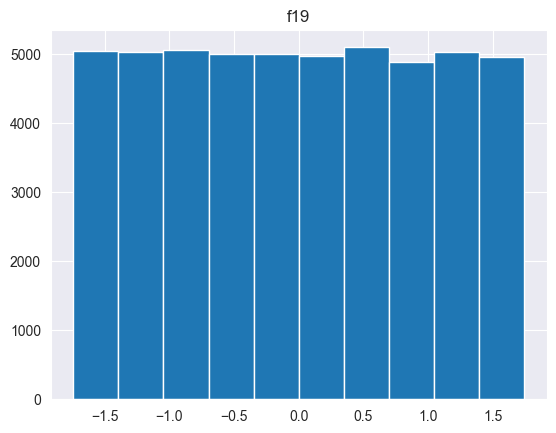

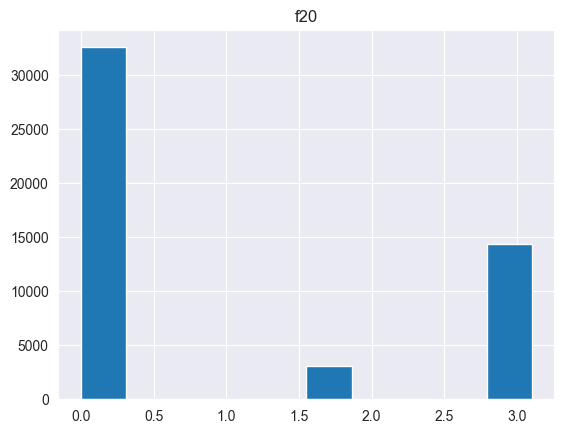

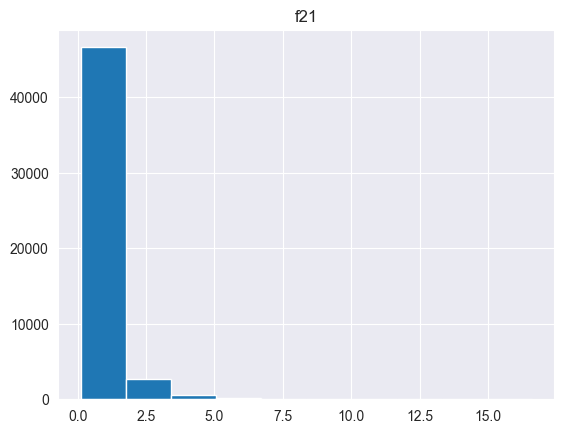

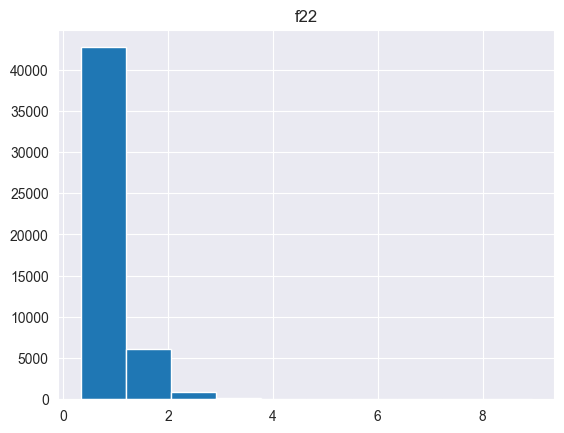

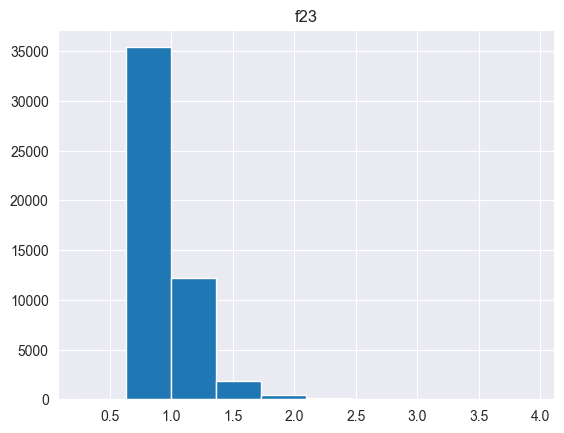

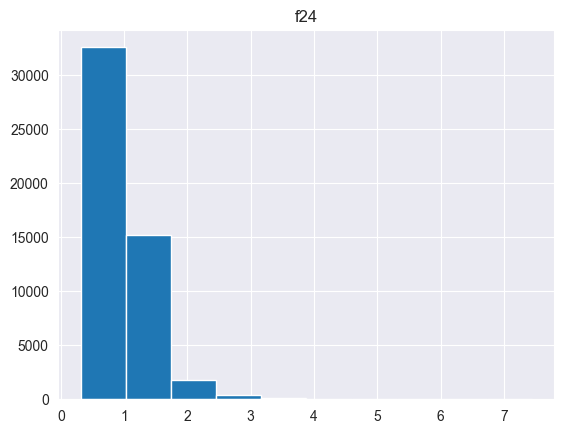

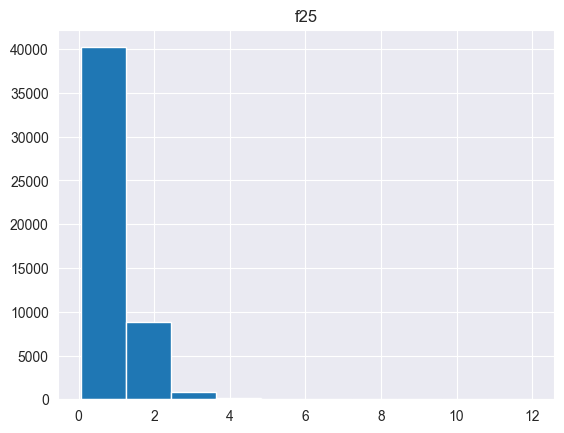

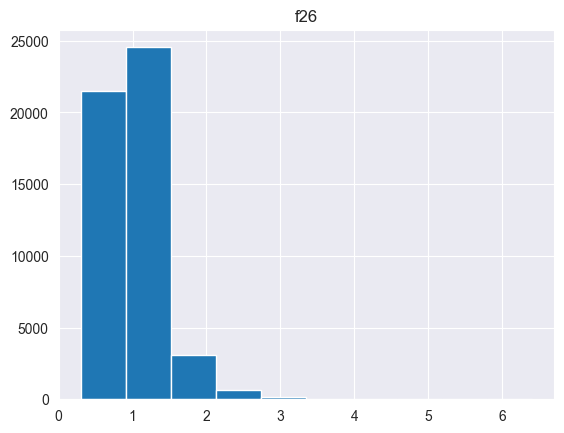

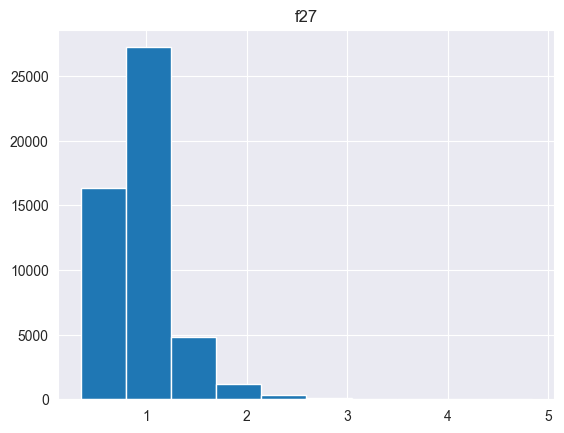

In [13]:
for i in training.columns:
    plt.hist(training[i])
    plt.title(i)
    plt.show()

          label        f0        f1        f2        f3        f4        f5  \
label  1.000000 -0.051872 -0.007501  0.002977 -0.094442 -0.008044  0.049674   
f0    -0.051872  1.000000 -0.004442  0.001025 -0.138891 -0.001533  0.175633   
f1    -0.007501 -0.004442  1.000000 -0.002513 -0.002453  0.003578  0.000677   
f2     0.002977  0.001025 -0.002513  1.000000  0.003273 -0.053338 -0.008121   
f3    -0.094442 -0.138891 -0.002453  0.003273  1.000000  0.003533  0.196777   
f4    -0.008044 -0.001533  0.003578 -0.053338  0.003533  1.000000 -0.002735   
f5     0.049674  0.175633  0.000677 -0.008121  0.196777 -0.002735  1.000000   
f6    -0.008622 -0.000380  0.269530 -0.000939 -0.008384 -0.003730 -0.002768   
f7    -0.004010  0.002784 -0.001804 -0.169199  0.000295 -0.150982 -0.004980   
f8    -0.011846 -0.004676  0.002068  0.001860 -0.026451  0.002640 -0.017354   
f9     0.020275  0.007342  0.004242 -0.002348  0.034967  0.000010  0.482917   
f10    0.000760 -0.009257  0.265495  0.004503  0.006

<Axes: >

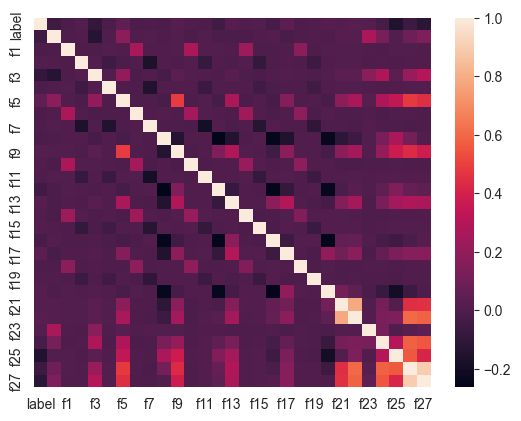

In [14]:
print(training.corr())
sns.heatmap(training.corr())

Based on the heatmap above, it appears that most of the features are not highly correlated with each other. This is good because it means that the features are independent of each other. The features showing strongest correlation appear to be those in the range of f23 to f26.

Data Preprocessing

The data is anonymous, meaning I don't know what each feature represents making feature engineering difficult. I will proceed with data preprocessing by scaling the features and splitting the data into training and validation sets.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = training.drop('label', axis=1)  # Features
y = training['label']  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the training data into a training and validation set (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)


Training data shape: (40000, 28)
Validation data shape: (10000, 28)


Model Building (Baseline Validation Performance)

The baseline will prove useful so we can assess how tuning can improve each of the models. I tried the following models using 5-fold cross-validation to get an estimate of the AUC-ROC score. The models I tried are:

- Naive Bayes (0.6485)
- Logistic Regression (0.6747)
- Decision Tree (0.6266)
- K-Nearest Neighbors (0.6433)
- Random Forest (0.7841)
- Support Vector Machine (0.7468)
- Xtreme Gradient Boosting (0.7842)
- Light Gradient Boosting (0.7941)

In [44]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

AUROC Score: 0.6485375720752685


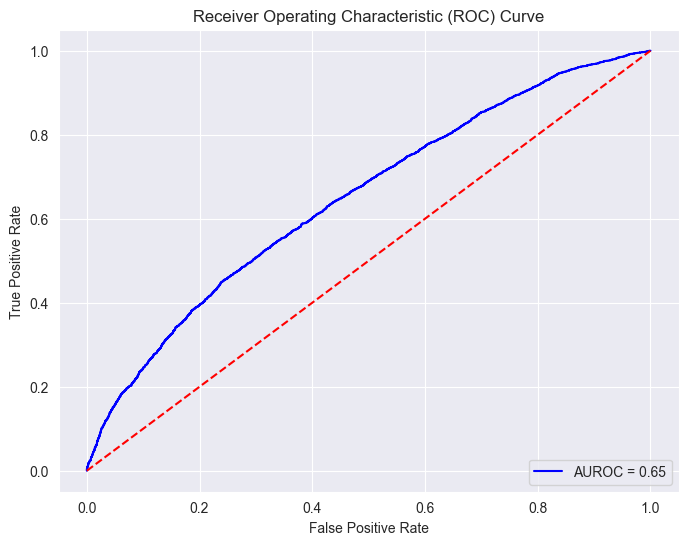

In [26]:
# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob = nb_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc = roc_auc_score(y_val, y_prob)
print("AUROC Score:", auroc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUROC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Logistic Regression AUROC Score: 0.6747114300705974


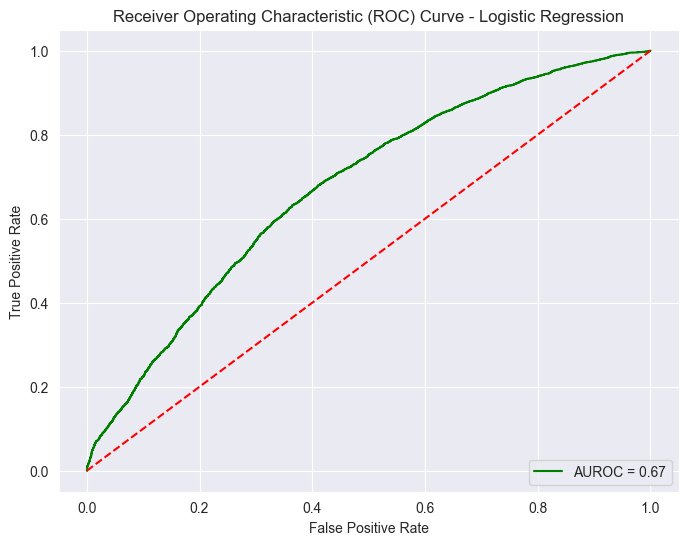

In [27]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=2000)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob_lr = lr_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_lr = roc_auc_score(y_val, y_prob_lr)
print("Logistic Regression AUROC Score:", auroc_lr)

# Plot the ROC curve for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', label=f'AUROC = {auroc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Decision Tree AUROC Score: 0.626645133102594


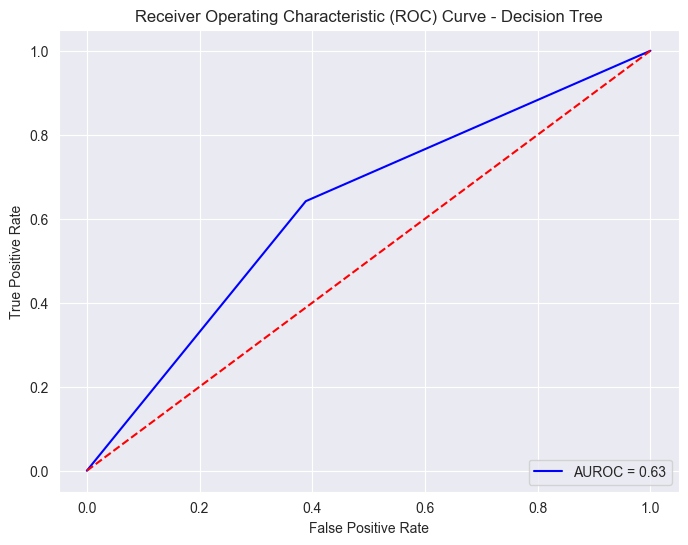

In [28]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob_dt = dt_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_dt = roc_auc_score(y_val, y_prob_dt)
print("Decision Tree AUROC Score:", auroc_dt)

# Plot the ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'AUROC = {auroc_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

K Nearest Neighbors AUROC Score: 0.6432716814879459


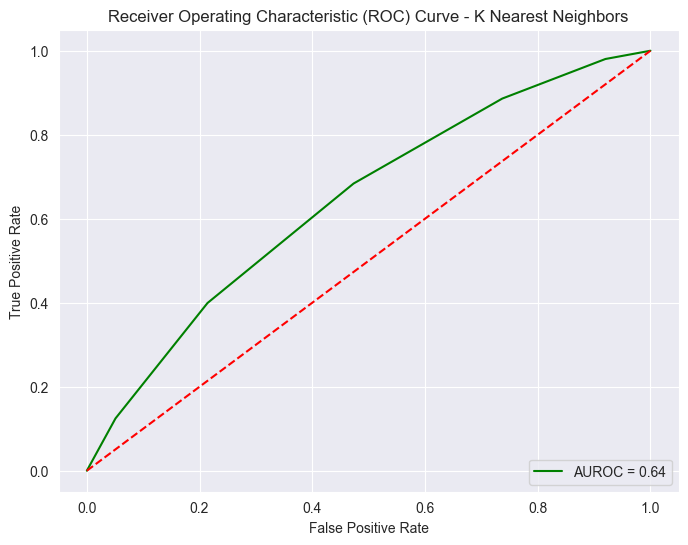

In [29]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob_knn = knn_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_knn = roc_auc_score(y_val, y_prob_knn)
print("K Nearest Neighbors AUROC Score:", auroc_knn)

# Plot the ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', label=f'AUROC = {auroc_knn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - K Nearest Neighbors")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Random Forest AUROC Score: 0.7841484247732667


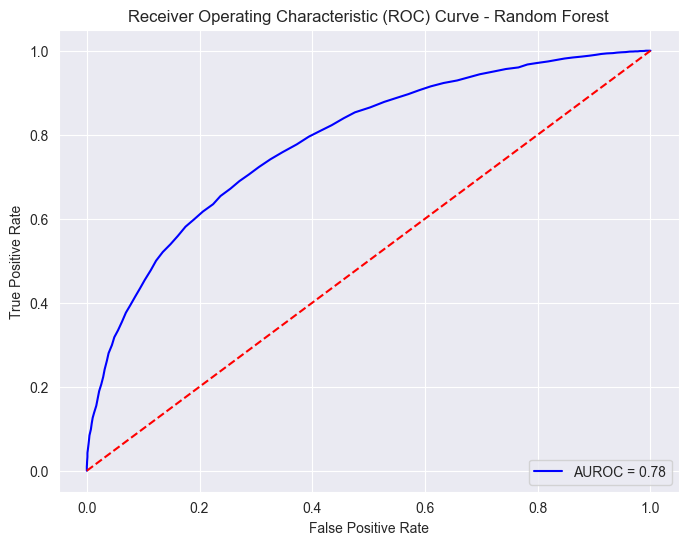

In [30]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_rf = roc_auc_score(y_val, y_prob_rf)
print("Random Forest AUROC Score:", auroc_rf)

# Plot the ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'AUROC = {auroc_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Support Vector Machine AUROC Score: 0.746761498456129


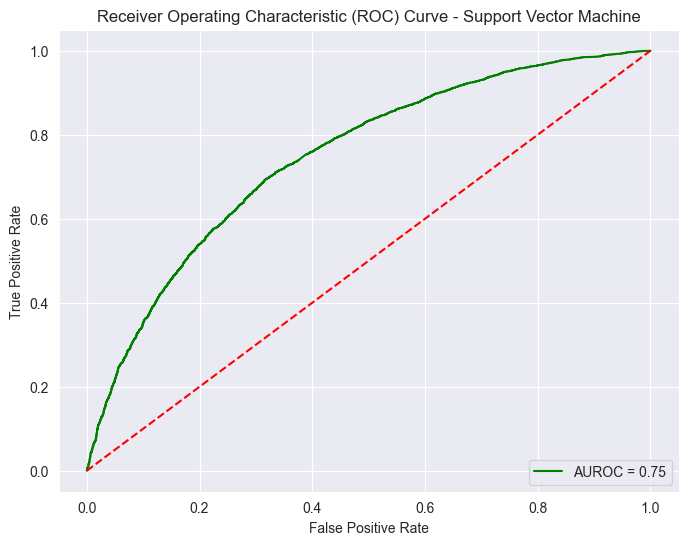

In [31]:
# Initialize the Support Vector Machine model
svm_model = SVC(probability=True, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob_svm = svm_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_svm = roc_auc_score(y_val, y_prob_svm)
print("Support Vector Machine AUROC Score:", auroc_svm)

# Plot the ROC curve for Support Vector Machine
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', label=f'AUROC = {auroc_svm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

XGBoost AUROC Score: 0.784164435703395


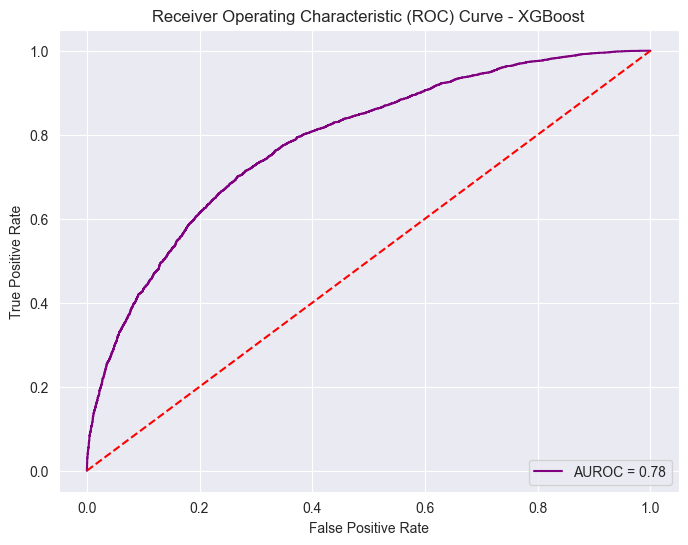

In [43]:
from xgboost import XGBClassifier
# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Get probabilities for the positive class (class 1)
y_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_xgb = roc_auc_score(y_val, y_prob_xgb)
print("XGBoost AUROC Score:", auroc_xgb)

# Plot the ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', label=f'AUROC = {auroc_xgb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

[LightGBM] [Info] Number of positive: 21283, number of negative: 18717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6136
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532075 -> initscore=0.128476
[LightGBM] [Info] Start training from score 0.128476
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.549164
LightGBM AUROC Score: 0.7941491165738568


/Users/blues/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


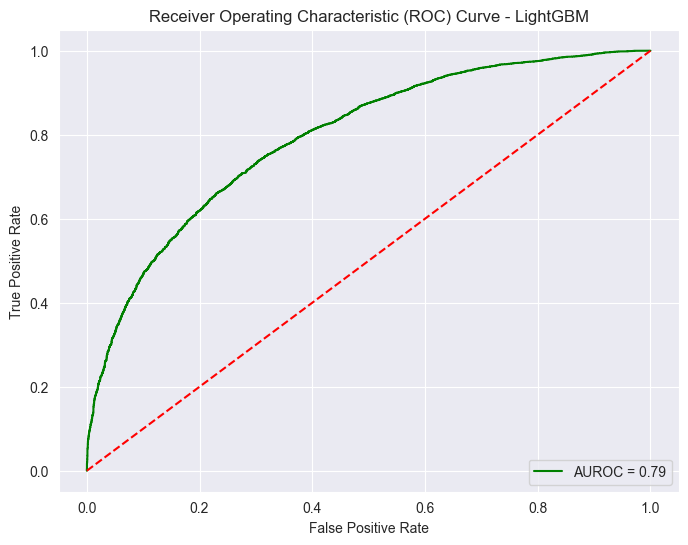

In [52]:
from lightgbm import LGBMClassifier, early_stopping

# Initialize the LightGBM model
lgb_model = LGBMClassifier(objective='binary', metric='binary_logloss', learning_rate=0.05, num_leaves=31, random_state=42)

# Train the model on the training data
lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[early_stopping(100)])

# Get probabilities for the positive class (class 1)
y_prob_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Calculate the AUROC score
auroc_lgb = roc_auc_score(y_val, y_prob_lgb)
print("LightGBM AUROC Score:", auroc_lgb)

# Plot the ROC curve for LightGBM
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_val, y_prob_lgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='green', label=f'AUROC = {auroc_lgb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()